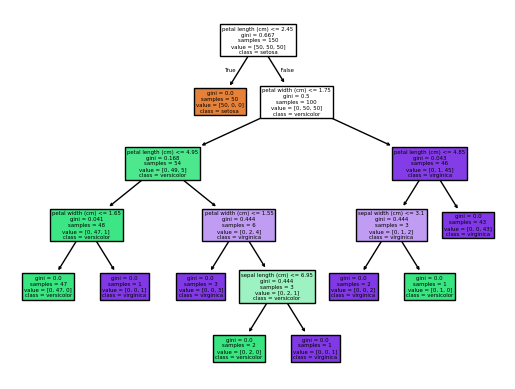

In [ ]:
# prac1 -  Implement decision tree classification technique
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=124)
model = clf.fit(X, y)
fig = plt.figure()
tree.plot_tree(clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
     filled=True)
plt.show()

[0 0 1 0 0 1 1 0 1 1]


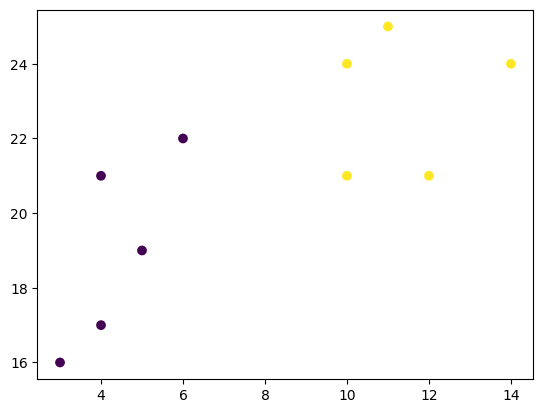

In [ ]:
# prac2 -  Implement Hierarchical CLustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

h = AgglomerativeClustering(n_clusters=2)
labels = h.fit_predict(data)
print(labels)
plt.scatter(x, y, c=labels)
plt.show()

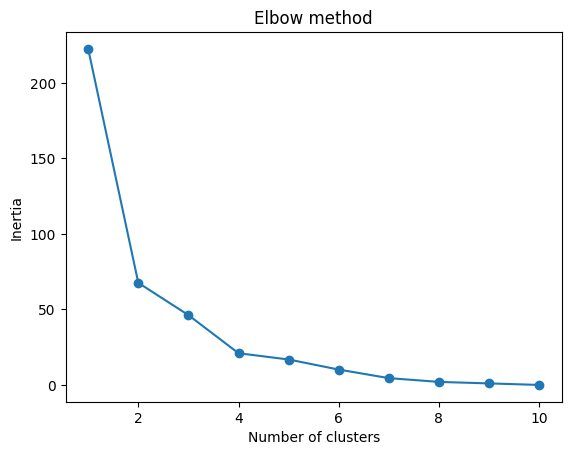

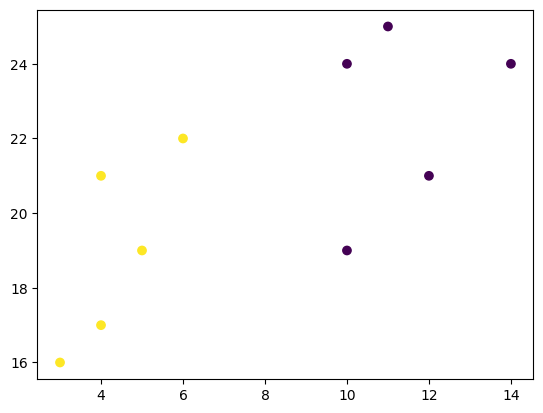

In [ ]:
# prac3 - Implement k - mean clustering algorithm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 19, 21]

######
from sklearn.cluster import KMeans
data = list(zip(x, y))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#####

data = list(zip(x, y))
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
# prac 4: Implement k- Nearest Neighbors (KNN) Algorithm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
print(df)

df['target'] = iris.target #output
df['flower_name'] =df.target.apply(lambda x:
                        iris.target_names[x])
print(df)
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

Coefficient: 0.60
Intercept: 2.20


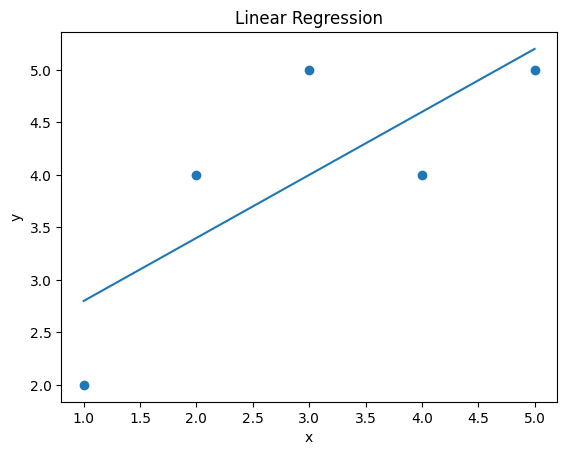

In [ ]:
  #prac 5 - Implement Linear Regression
  import numpy as np
  from sklearn.linear_model import LinearRegression
  import matplotlib.pyplot as plt

  #Sample deta

  X = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
  y = np.array([2, 4, 5, 4, 5])

  #Create and train lineer Megaessoncdal model Linear Regression() model.fit(x, y)
  model = LinearRegression()
  model.fit(X, y)


  #Print the coefficients
  print("Coefficient: %.2f" % model.score(X, y))
  print("Intercept: %.2f" % model.intercept_)

  #Plot the data and the regression Line plt.scatter(x, y)
  plt.scatter(X,y)
  plt.plot(X, model.predict(X),'')
  plt.title('Linear Regression')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

In [ ]:
#pract 6 - Implement Support Vector Machine
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test =train_test_split(cancer.data, cancer.target,
                 test_size=0.3,random_state=120) # 70% training and 30% test
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score
      (y_test, y_pred))


Accuracy: 0.9473684210526315


In [ ]:
#Practical 8-Implement word count using MapReduce
# Importing necessary libraries
from collections import defaultdict
import re

# Sample text data
text_data = """
This is an Apple.
Apple is red in colour.
"""

# Step 1: Map function
def map_function(text):
    words = re.findall(r'\w+', text.lower())  # Split the text into words
    word_count = defaultdict(int)
    for word in words:
        word_count[word] += 1  # Count the frequency of each word
    return word_count

# Step 2: Reduce function
def reduce_function(word_counts_list):
    total_count = defaultdict(int)
    for word_count in word_counts_list:
        for word, count in word_count.items():
            total_count[word] += count  # Aggregate counts from each map
    return total_count

# Step 3: Execute MapReduce
# Split the text into sentences for mapping
sentences = text_data.strip().split('\n')

# Map phase
mapped_results = [map_function(sentence) for sentence in sentences]

# Reduce phase
final_word_count = reduce_function(mapped_results)

# Print the results
print("Word Count:")
for word, count in final_word_count.items():
    print(f"{word}: {count}")

Word Count:
this: 1
is: 2
an: 1
apple: 2
red: 1
in: 1
colour: 1
